# Klasifikasi Gaussian Naive Bayes untuk Prediksi Sel Kanker Payudara Jinak Atau Ganas

#### Putra Al Farizi (09021282025047)

Algoritma Gaussian Naive Bayes\
Pengklasifikasi Naive Bayes paling sederhana yang memiliki asumsi bahwa data dari masing-masing label diambil dari distribusi Gaussian sederhana.

Dataset yang digunakan yaitu Breast Cancer yang di dapat dari https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin terdapat kolom Class yang mempunyai nilai 2 dan 4\
2 = Jinak \
4 = Ganas

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

# Data Preparation

In [2]:
#dataset = pd.read_csv('Breast Cancer-Copy2.csv')
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',
                names = ['Sample_Code', 'Clump_Thickness', 'Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape',
                         'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 
                         'Normal_Nucleoli', 'Mitoses', 'Class'])
dataset

,Sample_Code,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


# Data Cleansing

In [3]:
print(dataset.isnull().sum())

Sample_Code                    0
Clump_Thickness                0
Uniformity_of_Cell_Size        0
Uniformity_of_Cell_Shape       0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


Tidak ada Missing values pada data

# Data Preprocessing

In [41]:
dataset[['Class']].value_counts()

Class
2        444
4        239
dtype: int64

In [45]:
dataset[['Class']].value_counts()/(444+239)

Class
2        0.650073
4        0.349927
dtype: float64

Dapat kita lihat proporsi kelasnya yaitu 65%:35%, perbandingan ini cukup ballance. Dan tidak akan dilakukan downsampling karena mengingat jumlah observasi pada dataset yang cukup kecil.

<AxesSubplot:>

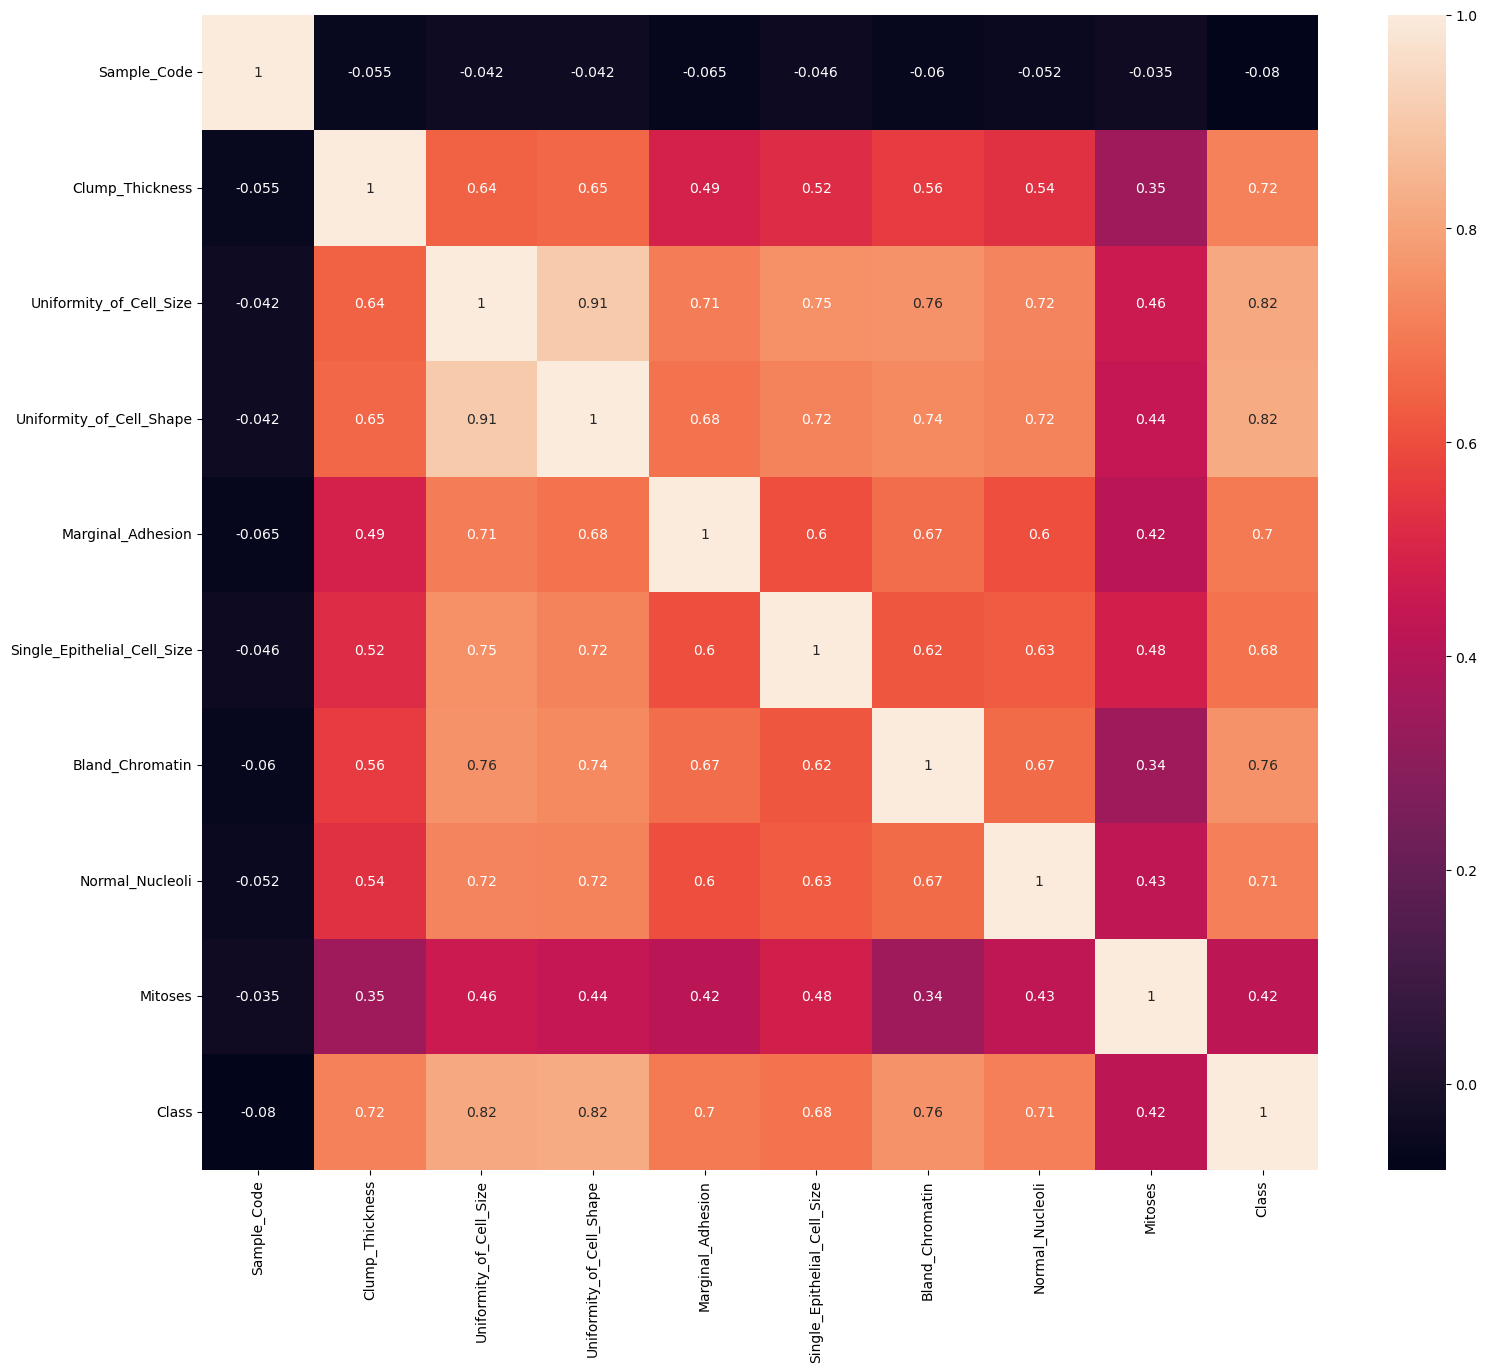

In [6]:
plt.figure(figsize=(18, 15))
sns.heatmap(dataset.corr(),annot=True)

Dari korelasi diatas Sample_Code mempunyai korelasi yang sangat kecil terhadap Class, jadi kita tidak akan memasukkan Sample_Code

In [7]:
dataset.drop(['Sample_Code'], axis=1, inplace=True)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_Thickness              699 non-null    int64 
 1   Uniformity_of_Cell_Size      699 non-null    int64 
 2   Uniformity_of_Cell_Shape     699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


Terdapat 1 dataframe bertype object yaitu Bare_Nuclei kita akan mengubah type datanye ke int64

In [9]:
dataset['Bare_Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

pada dataframe Bare_Nuclei bertype object terdapat nilai '?' yang tidak bisa diubah ke type data int64

In [10]:
dataset[dataset['Bare_Nuclei'] == '?']

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
23,8,4,5,1,2,?,7,3,1,4
40,6,6,6,9,6,?,7,8,1,2
139,1,1,1,1,1,?,2,1,1,2
145,1,1,3,1,2,?,2,1,1,2
158,1,1,2,1,3,?,1,1,1,2
164,5,1,1,1,2,?,3,1,1,2
235,3,1,4,1,2,?,3,1,1,2
249,3,1,1,1,2,?,3,1,1,2
275,3,1,3,1,2,?,2,1,1,2
292,8,8,8,1,2,?,6,10,1,4


data Bare_Nuclei yang bernilai ? cuman sedikit jadi kita bisa membuang barus yang mempunyai nilai ?

In [11]:
#membuang baris yang nilai bare_nulei='?'
dataset.drop(dataset[dataset['Bare_Nuclei'] == '?'].index, axis=0, inplace=True)

In [12]:
dataset[dataset['Bare_Nuclei'] == '?']

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class


Tidak ada lagi data yang bernilai'?' pada dataframe Bare_Nuclei

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_Thickness              683 non-null    int64 
 1   Uniformity_of_Cell_Size      683 non-null    int64 
 2   Uniformity_of_Cell_Shape     683 non-null    int64 
 3   Marginal_Adhesion            683 non-null    int64 
 4   Single_Epithelial_Cell_Size  683 non-null    int64 
 5   Bare_Nuclei                  683 non-null    object
 6   Bland_Chromatin              683 non-null    int64 
 7   Normal_Nucleoli              683 non-null    int64 
 8   Mitoses                      683 non-null    int64 
 9   Class                        683 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 58.7+ KB


In [14]:
#mengubah tipe data Bare_nuclei menjadi int64
dataset.Bare_Nuclei = dataset.Bare_Nuclei.astype('int64')

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump_Thickness              683 non-null    int64
 1   Uniformity_of_Cell_Size      683 non-null    int64
 2   Uniformity_of_Cell_Shape     683 non-null    int64
 3   Marginal_Adhesion            683 non-null    int64
 4   Single_Epithelial_Cell_Size  683 non-null    int64
 5   Bare_Nuclei                  683 non-null    int64
 6   Bland_Chromatin              683 non-null    int64
 7   Normal_Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 58.7 KB


In [16]:
dataset

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


# Cross Validation

In [17]:
#Mendefinisikan features dan labels
features = dataset.drop(['Class'], axis=1)
labels = dataset.Class

In [18]:
#Scaler
scaler = MinMaxScaler()
features - scaler.fit_transform(features)

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,4.555556,1.000000,1.000000,1.000000,1.888889,1.000000,2.777778,1.000000,1.000000
1,4.555556,3.666667,3.666667,4.555556,6.333333,9.000000,2.777778,1.888889,1.000000
2,2.777778,1.000000,1.000000,1.000000,1.888889,1.888889,2.777778,1.000000,1.000000
3,5.444444,7.222222,7.222222,1.000000,2.777778,3.666667,2.777778,6.333333,1.000000
4,3.666667,1.000000,1.000000,2.777778,1.888889,1.000000,2.777778,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...
694,2.777778,1.000000,1.000000,1.000000,2.777778,1.888889,1.000000,1.000000,1.000000
695,1.888889,1.000000,1.000000,1.000000,1.888889,1.000000,1.000000,1.000000,1.000000
696,4.555556,9.000000,9.000000,2.777778,6.333333,2.777778,7.222222,9.000000,1.888889
697,3.666667,7.222222,5.444444,3.666667,2.777778,3.666667,9.000000,5.444444,1.000000


In [19]:
#Splitting data
training_data, testing_data, training_label, testing_label = train_test_split(features,labels, test_size=0.2, shuffle = True, stratify=labels)

Data dipecah menjadi 2 bagian, 80% sebagai data train dan 20% sebagai data test.

## Model Gaussian Naive Bayes

In [20]:
model = GaussianNB()
model.fit(training_data, training_label)

GaussianNB()

# Model Evaluation 

In [21]:
model.score(training_data, training_label)

0.9633699633699634

In [22]:
model.score(testing_data, testing_label)

0.9562043795620438

Akurasi hasil prediksi model data training dan data testing hampir sama besar, artinya model tidak mengalami overfitting maupun underfitting.

In [23]:
training_predicted = model.predict(training_data)
testing_predicted = model.predict(testing_data)

In [24]:
testing_predicted.round()

array([2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2,
       4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 4, 4, 2, 4,
       2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 4, 4, 2,
       4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4,
       2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4,
       2, 2, 2, 2, 2], dtype=int64)

In [25]:
training_cm = confusion_matrix(training_label, training_predicted.round())
testing_cm = confusion_matrix(testing_label, testing_predicted.round())

In [26]:
training_cm

array([[339,  16],
       [  4, 187]], dtype=int64)

In [27]:
testing_cm

array([[86,  3],
       [ 3, 45]], dtype=int64)

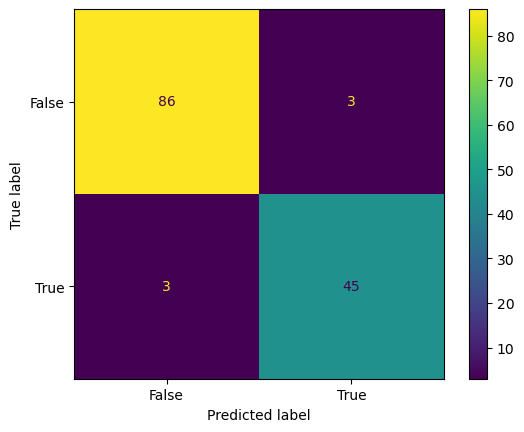

In [28]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = testing_cm, display_labels = [False, True])

cm_display.plot()
plt.show()

In [29]:
#testing
tp = testing_cm[1][1]
fn = testing_cm[1][0]
fp = testing_cm[0][1]
tn = testing_cm[0][0]

In [30]:
accuracy = (tp+tn)/(tp+fn+fp+tn)
accuracy

0.9562043795620438

In [31]:
sensitivity = tp/(tp+fn)
sensitivity

0.9375

In [32]:
specificity = tn/(tn+fp)
specificity

0.9662921348314607

In [33]:
precision = tp/(tp+fp)
precision

0.9375

In [34]:
f1_score = (2*precision*sensitivity)/(precision+sensitivity)
f1_score

0.9375

## Prediksi data

In [35]:
dataset['Class'].unique()

array([2, 4], dtype=int64)

In [36]:
data_predict = pd.read_csv('Breast Cancer teasting.csv')
data_predict

,Sample_Code,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,1000025,5,1,1,1,2,1,3,1,1


In [37]:
x_pred = data_predict.drop(['Sample_Code'], axis=1)
x_pred

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1


In [38]:
model.predict(x_pred)

array([2], dtype=int64)

In [39]:
x_pred['Class'] = model.predict(x_pred)
x_pred

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2


##### Kesimpulan
Model sudah bagus karna mempunyai akurasi 96% sehingga prediksi data lebih akurat